# BANK MARKETING STRATEGY

## Planejamento da Solução (IOT)

### INPUT (ENTRADA)

1. **PROBLEMA DE NEGÓCIO**

  O International Bank é um banco internacional que fornece produtos financeiros, como empréstimos, contas correntes, contas poupança, opções de investimentos, cartões de crédito e etc.

  A cada quarter do ano, os líderes se reúnem para decidir os objetivos da empresa para os próximos 3 meses. Nessa última reunião, uma das metas decididas é a criação de uma estratégia de marketing para abordar os clientes que usam cartão de crédito.

  OBJETIVO: Criar um produto de dados que cria uma segmentação de clientes que direcionará a estratégia de marketing e os resultados esperados são os seguintes:

   * Criar uma segmentação de clientes baseado em critérios claros de seleção.
   * Tornar a segmentação de clientes acessível para o time de operações.
   * Ensinar o time de operações sobre como usar a sua solução.
   * Transferir o conhecimento para os Cientistas de Dados da International Bank.
   * Recomendar 2-3 alavancas de negócio para cada segmento de clientes.


2. **CONJUNTO DE DADOS**
  - A empresa possui um conjunto de dados sobre o comportamento de uso de aproximadamente 9000 usuários de cartão de crédito ativos, durante os últimos 6 meses. O arquivo está no nível de clientes e possui 18 variáveis comportamentais. Fonte:
    https://www.kaggle.com/arjunbhasin2013/ccdata?select=CC+GENERAL.csv

### OUTPUT (SAÍDA)

1. **LISTA DE CLIENTES**
 - Uma lista com a indicação das pessoas, suas caracterśiticas e a qual segmento pertencem
    
    
2. **RELATÓRIO DE RESPOSTAS**
 - Um relatório contendo as respostas para as seguintes perguntas de negócio:
    - *Quem são as pessoas elegíveis para participar do programa de Insiders ?*
    - *Quantos clientes farão parte do grupo?*
    - *Quais as principais características desses clientes ?*
    - *Qual a porcentagem de contribuição do faturamento, vinda do Insiders ?*
    - *Qual a expectativa de faturamento desse grupo para os próximos meses ?*
    - *Quais as condições para uma pessoa ser elegível ao Insiders ?*
    - *Quais as condições para uma pessoa ser removida do Insiders ?*
    - *Qual a garantia que o programa Insiders é melhor que o restante da base ?*
    - *Quais ações o time de marketing pode realizar para aumentar o faturamento?*    

### TASKS (TAREFAS)

***1. Quem são as pessoas elegíveis para participar do programa de Insiders?***
 - O que é ser ***ELEGÍVEL***? Como a empresa define um cliente ***VALIOSO***?
 - 3 Abordagens:
     - Faturamento:
          - Alto Ticket Médio (valor médio das compras)
          - Alto LTV (Lifetime Value: o valor retornado pelo cliente ao longo do tempo)
          - Baixa Recência (tempo desde a última compra) ou Alta Frequência ( quantidade de compras )
          - Alto Basket Size ( quantidade média de produtos comprados )
          - Baixa probabilidade de Churn (encerrar relacionamento/contrato)
          - Alta Previsão de LTV
          - Alta propensão de compra

     - Custo:
          - Baixo número de devoluções

     - Experiência:  
          - Média alta de avaliações
            
            
***2. Quantos clientes farão parte do grupo?***
  - Número de clientes
  - % do grupo em relação ao total de clientes
    
    
***3. Quais as principais características desses clientes?***
  - Escrever os principais atributos dos clientes
       - Idade
       - País
       - Salário
        
  - Escrever os principais comportamentos de compra dos clientes ( métricas de negócio )
       - Atributos da clusterização (vide acima)
    
    
***4. Qual a porcentagem de contribuição do faturamento, vinda do Insiders?***
  - Calcular o faturamento total da empresa durante o ano.
  - Calcular o faturamento (%) apenas do cluster Insiders.
  
    
***5. Qual a expectativa de faturamento desse grupo para os próximos meses?***
  - Cálculo do LTV do grupo Insiders
  - Séries Temporais ( ARMA, ARIMA, HoltWinter, etc )
  - Análise de COHORT
    

***6. Quais as condições para uma pessoa ser elegível ao Insiders?***
  - Qual o período de avaliação (semanal, mensal)?
  - O "desempenho" do cliente está próximo da média do cluster *Insiders*. 
    
    
***7. Quais as condições para uma pessoa ser removida do Insiders?***
  - O "desempenho" do cliente não está mais próximo da média do cluster *Insiders*. 
    
    
***8. Qual a garantia que o programa Insiders é melhor que o restante da base?***
  - Teste de Hipóteses
  - Teste A/B (Bayesiano)
    
    
***9. Quais ações o time de marketing pode realizar para aumentar o faturamento?***
  - Descontos
  - Preferências de escolha
  - Produtos exclusivos

## 0.0 Settings

### 0.1 Imports

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from   IPython.display         import HTML, Image
from matplotlib import pyplot as plt
from sklearn import cluster as cl
from sklearn import metrics as mt

### 0.2 Helper Functions

In [2]:
def numerical_metrics(num_attributes):
    # supress notation
    np.set_printoptions(suppress=True)
    
    # central tendency - mean, median
    ct1 = pd.DataFrame( num_attributes.apply(np.median) ).T
    ct2 = pd.DataFrame( num_attributes.apply(np.mean) ).T
    

    # dispersion - std, min, max, range, skew, kurtosis
    d1 = pd.DataFrame( num_attributes.apply( np.min ) ).T # min
    d2 = pd.DataFrame( num_attributes.apply( np.max ) ).T # max
    d3 = pd.DataFrame( num_attributes.apply( lambda x: x.max() - x.min() ) ).T # range
    d4 = pd.DataFrame( num_attributes.apply( np.std ) ).T # std
    d5 = pd.DataFrame( num_attributes.apply( lambda x: x.skew() ) ).T # skew
    d6 = pd.DataFrame( num_attributes.apply( lambda x: x.kurtosis() ) ).T # kurtosis
    d7 = pd.DataFrame( num_attributes.apply( lambda x: x.describe()['25%'] ) ).T # 25%
    d8 = pd.DataFrame( num_attributes.apply( lambda x: x.describe()['75%'] ) ).T # 75%

    # concatenate
    metrics_numerical = pd.concat( [d1, d2, d3, d7, ct1, d8, ct2, d4, d5, d6] ).T.reset_index()
    metrics_numerical.columns = ['attributes','min','max','range','25%','median','75%','mean','std','skew','kurtosis']
    print(metrics_numerical)
    
    return None

In [3]:
def jupyter_settings():
    %matplotlib inline
    %pylab inline
    %config InlineBackend.figure_format = 'retina'
    
    plt.style.use( 'ggplot' )
    plt.rcParams['figure.figsize'] = [24,12]
    plt.rcParams['font.size'] = 24
    
    display( HTML( '<style>.container { width:100% !important; }</style>') )
    pd.options.display.max_columns = None
    pd.options.display.max_rows = None
    pd.set_option( 'display.expand_frame_repr', False )
    pd.set_option('display.float_format', lambda x: '%.2f' % x)  
    
    sns.set()
    
jupyter_settings()

Populating the interactive namespace from numpy and matplotlib


### 0.3 Loading Data

In [4]:
df_raw = pd.read_csv( '../data/raw/cc_general.csv' )

## 1.0 Data Description

In [5]:
df1 = df_raw.copy()

In [6]:
df1.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.90,0.82,95.40,0.00,95.40,0.00,0.17,0.00,0.08,0.00,0,2,1000.00,201.80,139.51,0.00,12
1,C10002,3202.47,0.91,0.00,0.00,0.00,6442.95,0.00,0.00,0.00,0.25,4,0,7000.00,4103.03,1072.34,0.22,12
2,C10003,2495.15,1.00,773.17,773.17,0.00,0.00,1.00,1.00,0.00,0.00,0,12,7500.00,622.07,627.28,0.00,12
3,C10004,1666.67,0.64,1499.00,1499.00,0.00,205.79,0.08,0.08,0.00,0.08,1,1,7500.00,0.00,NaN,0.00,12
4,C10005,817.71,1.00,16.00,16.00,0.00,0.00,0.08,0.08,0.00,0.00,0,1,1200.00,678.33,244.79,0.00,12


### 1.1 Rename Columns

In [7]:
df1.columns = df1.columns.str.lower()

### 1.2 Data Dimensions

In [8]:
print('Number of rows: {}'.format(df1.shape[0]))
print('Number of columns: {}'.format(df1.shape[1]))

Number of rows: 8950
Number of columns: 18


### 1.3 Data Types

In [9]:
df1.dtypes

cust_id                              object
balance                             float64
balance_frequency                   float64
purchases                           float64
oneoff_purchases                    float64
installments_purchases              float64
cash_advance                        float64
purchases_frequency                 float64
oneoff_purchases_frequency          float64
purchases_installments_frequency    float64
cash_advance_frequency              float64
cash_advance_trx                      int64
purchases_trx                         int64
credit_limit                        float64
payments                            float64
minimum_payments                    float64
prc_full_payment                    float64
tenure                                int64
dtype: object

### 1.4 Change Types

### 1.5 Check Missing Values

In [10]:
df1.isna().sum()

cust_id                               0
balance                               0
balance_frequency                     0
purchases                             0
oneoff_purchases                      0
installments_purchases                0
cash_advance                          0
purchases_frequency                   0
oneoff_purchases_frequency            0
purchases_installments_frequency      0
cash_advance_frequency                0
cash_advance_trx                      0
purchases_trx                         0
credit_limit                          1
payments                              0
minimum_payments                    313
prc_full_payment                      0
tenure                                0
dtype: int64

In [11]:
np.round(df1.isna().sum()/df1.shape[0],3)

cust_id                            0.00
balance                            0.00
balance_frequency                  0.00
purchases                          0.00
oneoff_purchases                   0.00
installments_purchases             0.00
cash_advance                       0.00
purchases_frequency                0.00
oneoff_purchases_frequency         0.00
purchases_installments_frequency   0.00
cash_advance_frequency             0.00
cash_advance_trx                   0.00
purchases_trx                      0.00
credit_limit                       0.00
payments                           0.00
minimum_payments                   0.04
prc_full_payment                   0.00
tenure                             0.00
dtype: float64

### 1.6 Replace NA

In [12]:
df1 = df1.dropna()

In [13]:
df1.isna().sum()

cust_id                             0
balance                             0
balance_frequency                   0
purchases                           0
oneoff_purchases                    0
installments_purchases              0
cash_advance                        0
purchases_frequency                 0
oneoff_purchases_frequency          0
purchases_installments_frequency    0
cash_advance_frequency              0
cash_advance_trx                    0
purchases_trx                       0
credit_limit                        0
payments                            0
minimum_payments                    0
prc_full_payment                    0
tenure                              0
dtype: int64

### 1.7 Descriptive Statistics

In [14]:
num_attributes = df1.select_dtypes( include=['int64','float64'])
cat_attributes = df1.select_dtypes( exclude=['int64','float64'])

#### 1.7.1 Numerical Attributes

In [15]:
numerical_metrics(num_attributes)

                          attributes   min      max    range     25%  median     75%    mean     std  skew  kurtosis
0                            balance  0.00 19043.14 19043.14  148.10  916.86 2105.20 1601.22 2095.45  2.37      7.55
1                  balance_frequency  0.00     1.00     1.00    0.91    1.00    1.00    0.90    0.21 -2.08      3.37
2                          purchases  0.00 49039.57 49039.57   43.37  375.40 1145.98 1025.43 2166.98  8.06    108.68
3                   oneoff_purchases  0.00 40761.25 40761.25    0.00   45.00  599.10  604.90 1684.21  9.94    160.12
4             installments_purchases  0.00 22500.00 22500.00    0.00   94.78  484.15  420.84  917.19  7.22     94.19
5                       cash_advance  0.00 47137.21 47137.21    0.00    0.00 1132.39  994.18 2121.34  5.14     52.14
6                purchases_frequency  0.00     1.00     1.00    0.08    0.50    0.92    0.50    0.40  0.03     -1.64
7         oneoff_purchases_frequency  0.00     1.00     1.00    

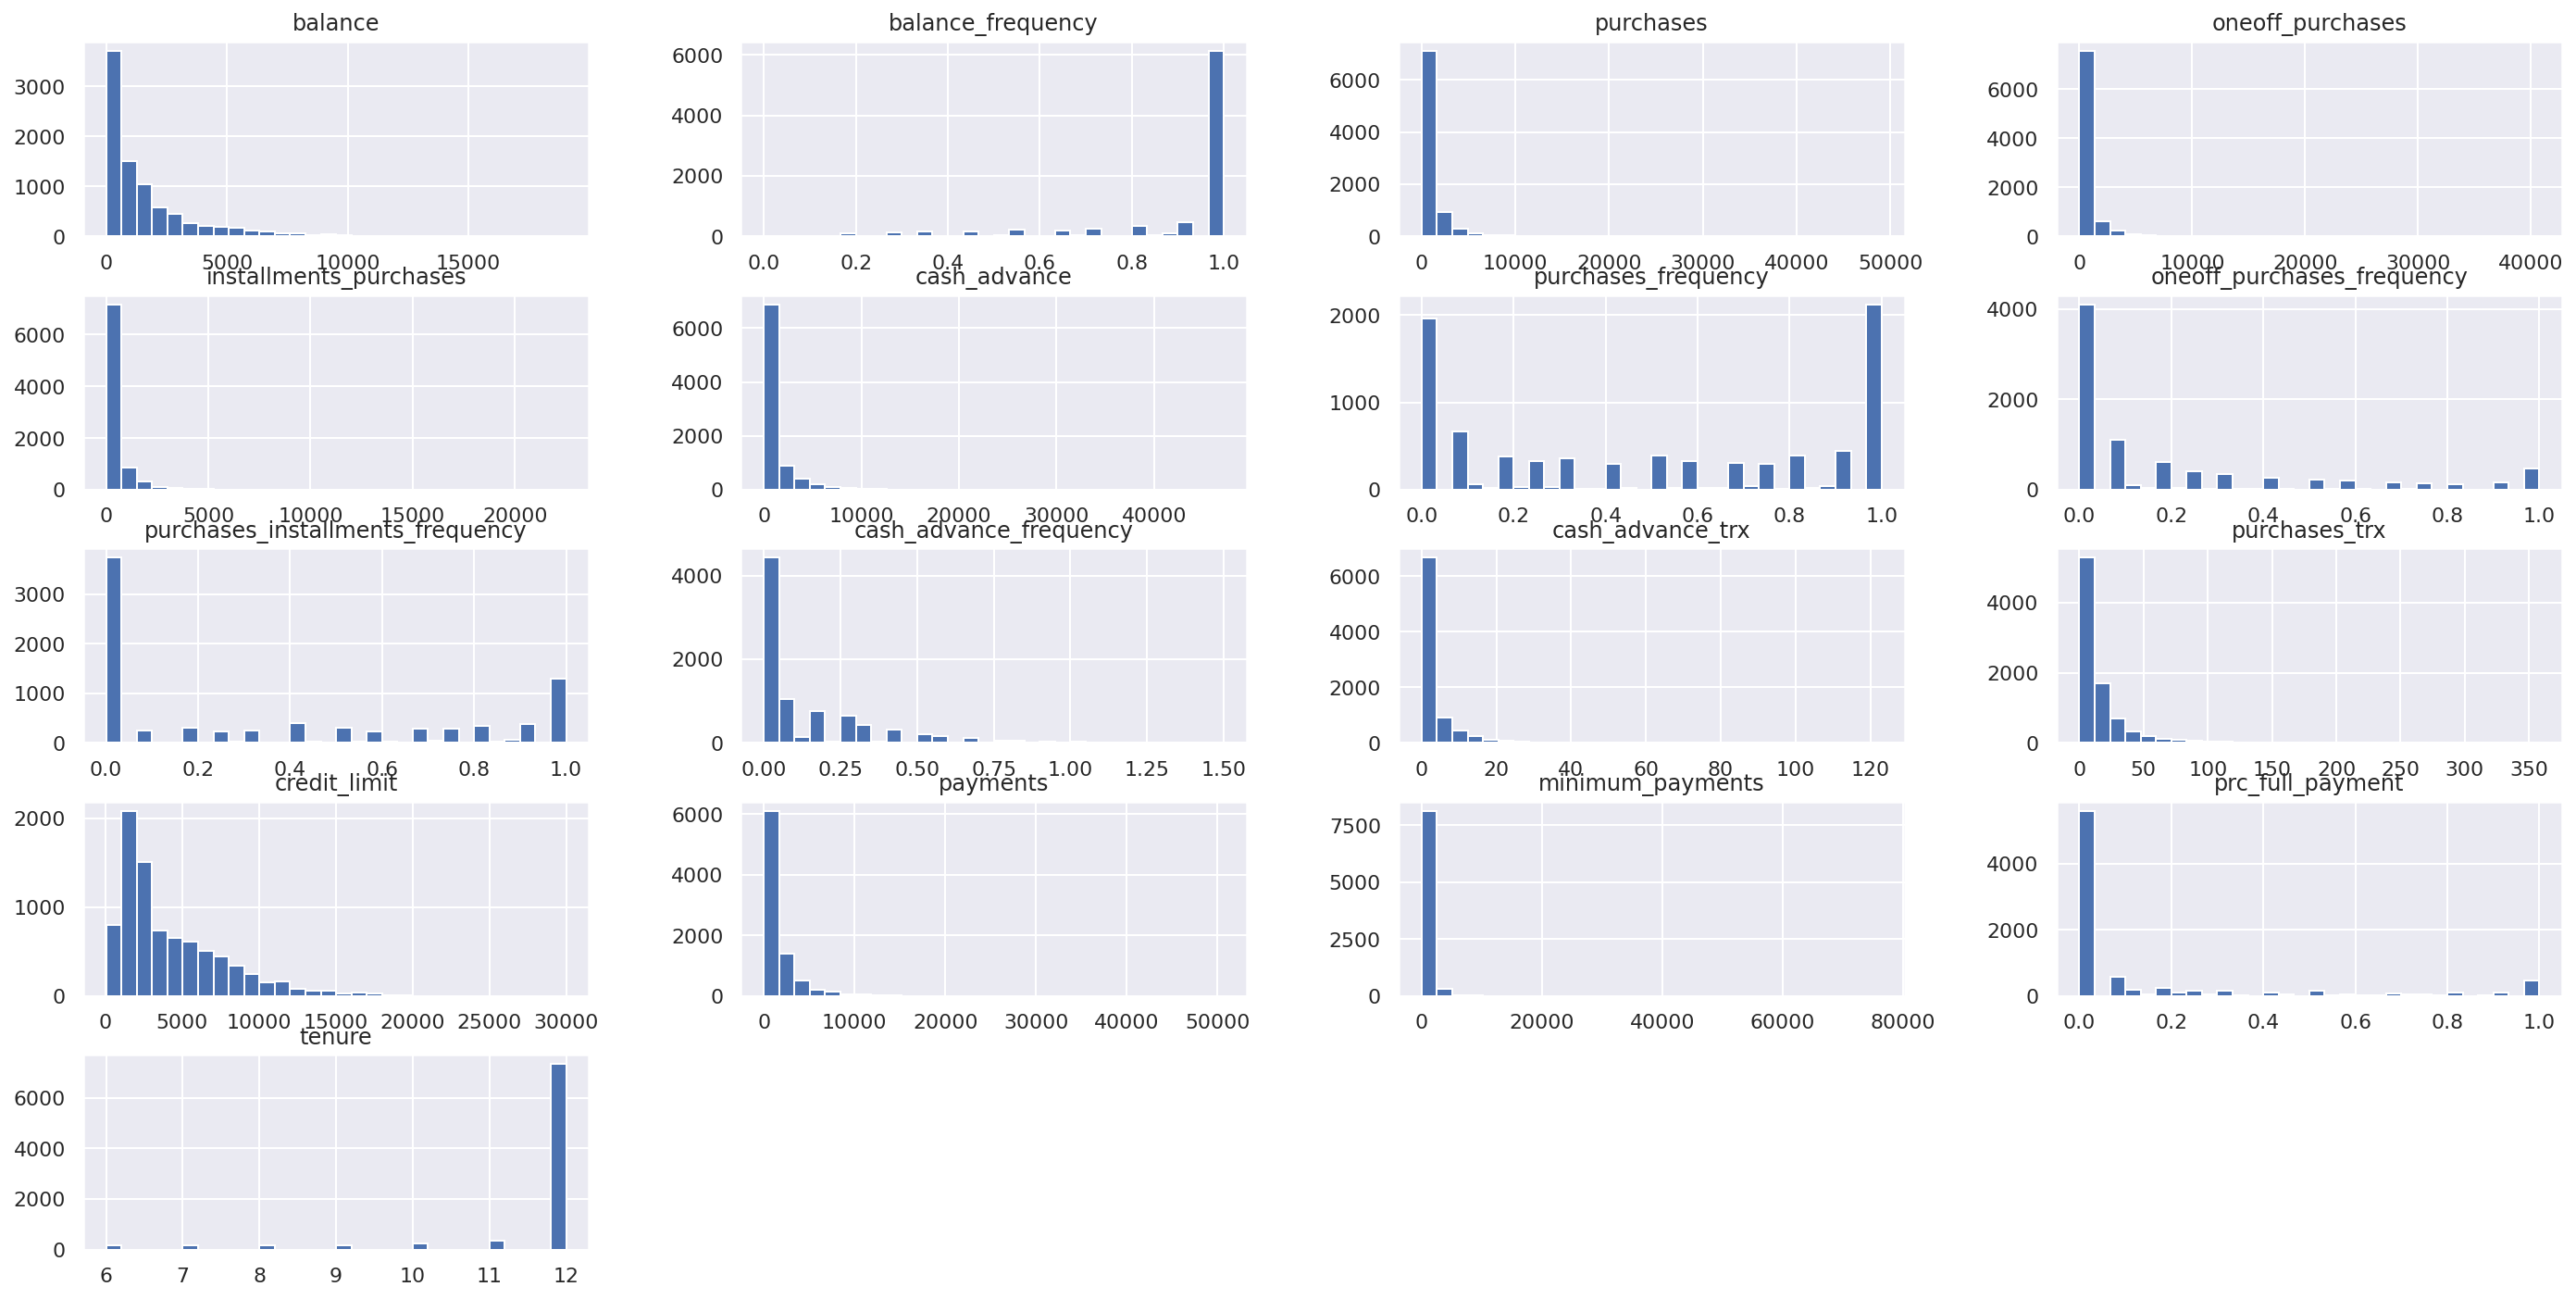

In [16]:
num_attributes.hist(bins=30);

#### 1.6.1 Categorical Attributes

In [17]:
cat_attributes.describe()

,cust_id
count,8636
unique,8636
top,C10001
freq,1


## 2.0 Data Filtering

## 3.0 Feature Engineering

## 4.0 EDA - Space Study

## 5.0 Data Preparation

## 6.0 Feature Selection

In [46]:
cols_drop = ['cust_id']
X = df1.drop(columns=cols_drop, axis=1).copy()

## 7.0 Hiperparameter Fine Tuning

### K-Means

In [47]:
clusters = [2,3,4,5,6,7,8]

In [59]:
sil_list = []
dav_list = []
for k in clusters:
    # model definition
    kmeans_model = cl.KMeans(n_clusters=k)
    
    # model training
    kmeans_model.fit(X)
    
    # model predict
    labels_kmeans = kmeans_model.predict(X)
    
    # model performance
    sil = mt.silhouette_score(X, labels_kmeans)
    dav = mt.davies_bouldin_score(X, labels_kmeans)
    sil_list.append(sil)
    dav_list.append(dav)

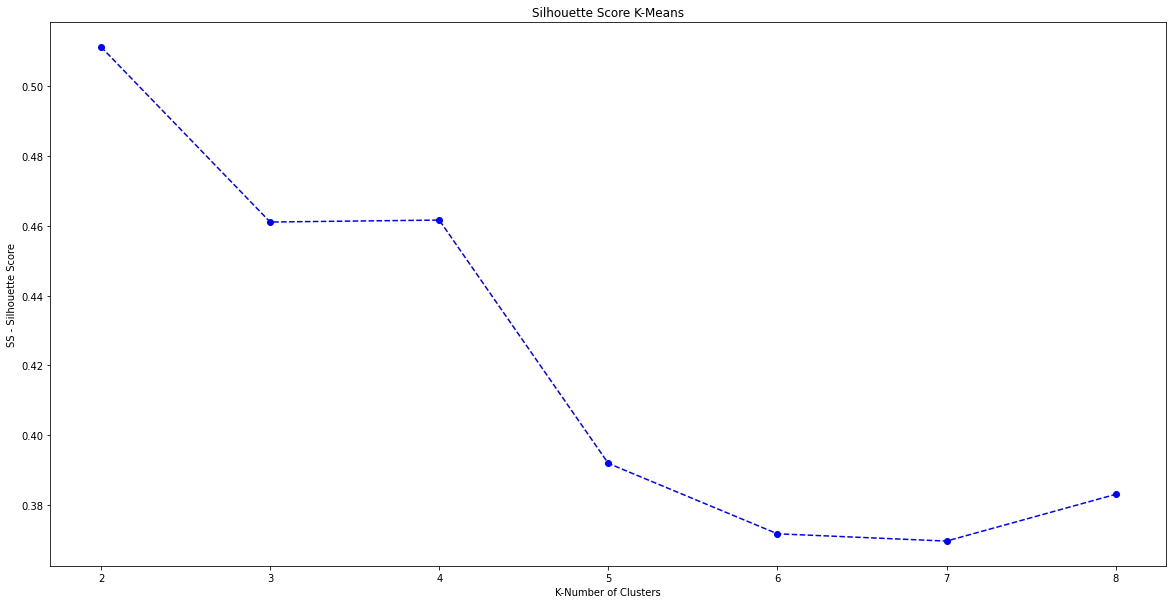

In [57]:
plt.figure(figsize=(20,10))
plt.plot(clusters,sil_list,linestyle='--', marker='o', color='b');
plt.xlabel('K-Number of Clusters');
plt.ylabel('SS - Silhouette Score');
plt.title('Silhouette Score K-Means');
plt.show()

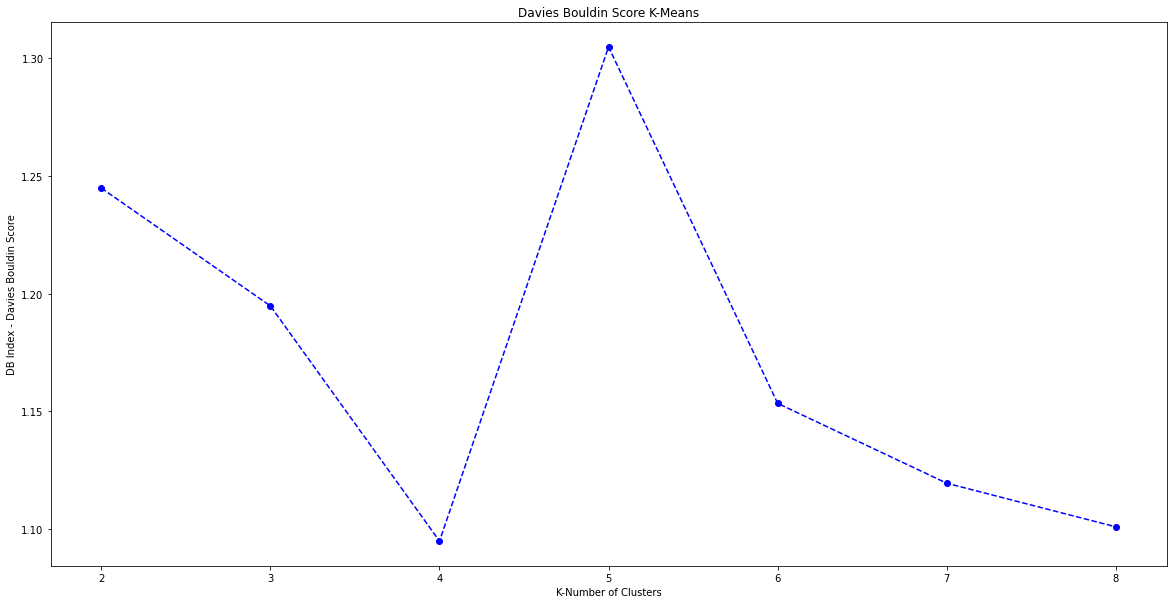

In [60]:
plt.figure(figsize=(20,10))
plt.plot(clusters,dav_list,linestyle='--', marker='o', color='b');
plt.xlabel('K-Number of Clusters');
plt.ylabel('DB Index - Davies Bouldin Score');
plt.title('Davies Bouldin Score K-Means');
plt.show()

## 8.0 Machine Learning Training

## 9.0 Clustering Analysis

## 10.0 EDA - Insight Reports

## 11.0 Deploy to Production